# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__PROJETO DA UNIDADE 2__</center>

#### <center>__ALUNO:__ Maria Luíza Teixeira Nascimento.</center>

####<center>__Tema__: "Predição de dados de saúde usando regressão linear".</center>

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>

<p>O tema escolhido foi <strong>"Predição de dados de saúde usando regressão linear"</strong>.</p> 

<p>A análise da Regressão consiste na realização de uma análise estatística com objetivo de verificar a existência de uma relação funcional entre uma variável dependente com uma ou mais variáveis independentes. Utilizando gráficos para  tentar estabelecer uma equação que representa o fenômeno.</p>

<p>A regressão Linear é um algoritmo de machine learning que é usado para fazer predições, também é conhecido como um algoritmo aprendizado supervisionado. É uma técnina que consiste em uma equação linear que usa valores de entrada para predizer valores de saída.</p>

<p>Em resumo das <strong>ferramentas usada</strong> temos: Ferraments básicas como <strong>pandas</strong>, <strong>numpy</strong>, <strong>sklearn</strong> e o <strong>matplotlib.pyplot</strong>.</p>

<p>Temos bibliotecas para a <strong>Manipulação de Dados</strong>, para a <strong>Visualização de Dados</strong>, bem como para o <strong>uso da função matemática Regressão Linear</strong>.</p>

<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

<p>Um modelo também chamado de predativo é, de forma simplificada, uma função matemática que pode ser aplicada a uma grande quantidade de dados soltos. A ideia é evidenciar padrões capazes de apontar as próximas tendências. É como se fosse possível prever com eficiência o futuro, de forma matemática, com probabilidade e estatística.</p>

<p>Logo, o cenário escolhido para o uso da Regressão Linear com QR Decomposition é com um DataSet com dados de: <strong>Total de casos</strong> e <strong>Total de mortes</strong> do mundo com o COVID-19, analisado durante o ano de 2020 nos dias e mes de <strong>21/Janeiro a 12/Março</strong>. O dataset original leva em consideração também alguns outros países, mas não selecionaremos um país especifíco para a nossa análise, logo estaremos analisando os dados do mundo todo (Worldwide).</p>

<div class="alert alert-block alert-danger">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

<p>Dentre algumas <strong>técninas utilizadas</strong> está o <strong>QR Decomposition</strong>. A decomposição QR, também conhecida como fatoração QR, é um método usado ao converter uma matriz na forma A = QR.</p>

<p>Na fórmula, A representa a matriz inicial, Q representa uma matriz ortogonal, e R representa uma matriz triangular superior. Uma matriz triangular superior é um tipo especial de matriz quadrada na qual todas as entradas abaixo da diagonal principal são zero. Frequentemente, a decomposição QR é usada para resolver o problema dos mínimos quadrados lineares.</p>

<p>Em essência, a decomposição QR pega uma matriz quadrada ou retangular e a decompõe em duas unidades, Q e R. Ao quebrar essas matrizes, elas se tornam mais fáceis de trabalhar em outras capacidades, expandindo a aplicabilidade de uma determinada função.</p>

In [65]:
import pandas as pd

import numpy as np
from numpy import array
from numpy.linalg import inv
from numpy.linalg import qr

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

<p>Acima foi feito a importação de <strong>todas</strong> as bibliotecas utilizadas. <strong>pandas</strong> e os vários <strong>numpy</strong> primeiros para a <strong>Manipulação de Dados</strong>. O <strong>matplotlib</strong> <strong>Visualização de Dados</strong>, logo em seguida temos as bibliotecas para <strong>Aplicação matemática da regressão linear</strong>.</p>

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
df_cases = pd.read_csv('/content/drive/My Drive/Data/total_cases.csv')
df_cases.head()

,date,Worldwide,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,...,Thailand,Togo,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vatican,Vietnam
0,2020-01-21,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-22,314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-23,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,2020-01-24,846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
4,2020-01-25,1320,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,4,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0


In [68]:
df_death = pd.read_csv('/content/drive/My Drive/Data/total_deaths.csv')
df_death.head()

,date,Worldwide,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,...,Thailand,Togo,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vatican,Vietnam
0,2020-01-21,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-22,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-23,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-24,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-25,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p>Acima temos a planilha que usaremos para aplicar a <strong>Regressão Linear</strong>.</p> 

<p>Primeiramente temos dois documentos, o primeiro é referente ao <strong>total de casos</strong> e o segundo sobre <strong>total de mortes</strong> de Covid-19 em alguns países e o valor acumulado no mundo no ano de 2020, com a variação de tempo de 21/01/2020 até 12/03/2020. Para isso, devemos limitar nossos campo de dado, usaremos a <strong>data (date) e as colunas "Worldwide"</strong> como um ponto de partida para as nossas análises. Isso porquê não analisaremos em um país especifico.</p>

<p>Para a análise das nossas variações usaremos o valor atual menos o valor do dia anterior.</p>

In [69]:
listaColunas = df_death.columns
for i in range(len(listaColunas)):
  if (listaColunas[i] != 'date' and listaColunas[i] != 'Worldwide'):
    #df = df.drop(columns=[listaColunas[i]]) 
    df_death = df_death.drop(columns=[listaColunas[i]])
    df_cases = df_cases.drop(columns=[listaColunas[i]])

In [70]:
df_cases.rename(columns={'Worldwide': 'Worldwide_cases'}, inplace = True)
df_cases.head()

,date,Worldwide_cases
0,2020-01-21,282
1,2020-01-22,314
2,2020-01-23,581
3,2020-01-24,846
4,2020-01-25,1320


In [71]:
df_death.rename(columns={'Worldwide': 'Worldwide_death'}, inplace = True)
df_death.head()

,date,Worldwide_death
0,2020-01-21,6
1,2020-01-22,6
2,2020-01-23,17
3,2020-01-24,25
4,2020-01-25,41


<p>Acima, fizemos a limitação dos nossos DataFrames para as coluns "Date" e "Worldwide".</p>

In [72]:
df_death['date'] = pd.to_datetime(df_death['date'])
df_cases['date'] = pd.to_datetime(df_cases['date'])

<p>Mudamos a coluna (date) que era originalmente string para o tipo date.</p>

In [73]:
df = pd.merge(df_cases, df_death, how = 'inner', on = 'date')

In [74]:
df.head()

,date,Worldwide_cases,Worldwide_death
0,2020-01-21,282,6
1,2020-01-22,314,6
2,2020-01-23,581,17
3,2020-01-24,846,25
4,2020-01-25,1320,41


<p>Fizemos a junção das duas tabelas separadas para uma só, os juntando através da Data. Já que é o denominador comum entre elas.</p>

In [75]:
df.describe()

,Worldwide_cases,Worldwide_death
count,52.000000,52.000000
mean,54497.846154,1706.403846
std,38340.152995,1379.941278
min,282.000000,6.000000
25%,16682.500000,347.750000
50%,51218.500000,1597.500000
75%,84089.750000,2874.500000
max,125048.000000,4613.000000


<p>Usamos o <strong>.describe() da biblioteca pandas</strong> para gerar estatísticas descritivas.</p>

<p>Estatísticas descritivas incluem aquelas que resumem a tendência central, dispersão e forma da distribuição de um conjunto de dados, excluindo os valores de NaN.</p>

In [76]:
df['Variation'] = df['Worldwide_cases'].sub(df['Worldwide_death'])
df.head()

,date,Worldwide_cases,Worldwide_death,Variation
0,2020-01-21,282,6,276
1,2020-01-22,314,6,308
2,2020-01-23,581,17,564
3,2020-01-24,846,25,821
4,2020-01-25,1320,41,1279


<p>Acima usamos o <strong>.diff</strong> e aplicamos a coluna <strong>Worldwide</strong>. Para gerarmos uma tabela de variação entre os casos menos as mortes.</p>

In [77]:
treino = df

<p>A partir de agora, estaremos focados em nossa regressão linear. </p>

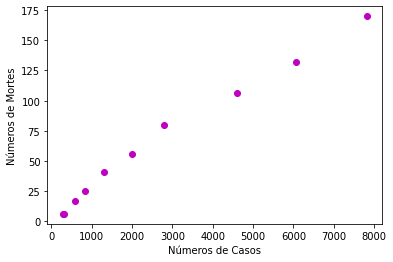

In [78]:
x = treino.Worldwide_cases[:10]
y = treino.Worldwide_death[:10]
#plt.scatter(treino.Worldwide_cases[:10],treino.Worldwide_death[:10],color='b')
plt.plot(x, y, 'mo')
plt.xlabel('Números de Casos')
plt.ylabel('Números de Mortes')
#plt.autoscale('False')
plt.show()

<p>Acima temos a "plotagem" dos valores de casos e mortes e uma relação simples de correspondência dado pela data (Já que os valores foram "alinhados" pela data).</p>

In [79]:
array1 = []
for i in range(10):
  array1.append([df['Worldwide_cases'][i]])

array2 = list(np.array(df['Worldwide_death'][:10]))
array2 = array2

<p>Transformando os valores da colunas "Worldwide_cases" e "Worldwide_death" em listas de valores, mas pegamos apenas os 10 primeiros.</p>

In [80]:
rl1 = LinearRegression()
rl1.fit(array1, array2)

LinearRegression()

<p>Utilizamos o método "LinearRegression()" da biblioteca <strong>sklearn.linear_model</strong>. Esse método basicamente encontra o melhor valor para o intercepto e a inclinação, o que resulta em uma linha que melhor se ajusta aos dados..</p>

In [81]:
m = rl1.coef_[0]
b = rl1.intercept_
#print(m, b)
print(f'm = {m:.1f}, b = {b:.1f}')
print(f'Equação da reta: y = {m:.1f}x + {b:.1f}')

m = 0.0, b = 7.2
Equação da reta: y = 0.0x + 7.2


<p>Acima temos a formulação de como seria a formula da equação que nos dará o resultado da regressão linear.</p> 
<p>Para isso temos: <strong>coef_</strong> que é o coeficientes estimados para o problema de regressão linear, e o <strong>intercept_</strong> que é o termo independente no modelo linear.</p>

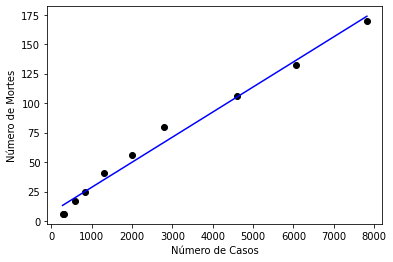

In [82]:
# Scatter plot da altura e peso de cada pessoa
plt.scatter(array1, array2, color='black')

# Gráfico de linha 
predicted_values = rl1.predict(array1)
plt.plot(array1, predicted_values, color='blue')
plt.xlabel('Número de Casos')
plt.ylabel('Número de Mortes')

plt.show()

<p>Acima temos, a plotagem do da regressão linear.</p> 

<p>Conseguimos com: </p>

<p>O <strong>scatter</strong>, que são representações gráficas do relacionamento entre duas variáveis numéricas. Utilizando os pontos para representar essa relação, cada ponto representa o valor de uma variável no eixo horizontal e o valor de outra variável no eixo vertical.</p>

<p>O uso do <strong>predict</strong>, nos permite prever os rótulos dos valores de dados com base no modelo treinado.</p>

<h5>Outra forma de chegar nesse resultado:</h5>

In [83]:
a1 = (np.array(df['Worldwide_cases'][:10]))
a2 = (np.array(df['Worldwide_death'][:10]))

<p>Para isso, diferente do que foi escrito acima, usaremos <strong>"np.array"</strong> ao invés do list. Mas continuamos usamos os 10 primeiro.</p>

In [84]:
X, y = a1[:10], a2[:10]
X = X.reshape((len(X), 1))

<p>Mas ao usarmo o np.array, precisaremos o método de reshape.</p>

In [85]:
Q, R = qr(X)
b = inv(R).dot(Q.T).dot(y)
print(b)

[0.02272411]


<p>Após o método de reshape podemos usar método do <strong>QR Decomposition</strong>.</p>

<p>A decomposição QR é uma abordagem de quebrar uma matriz em seus elementos constituintes.</p>


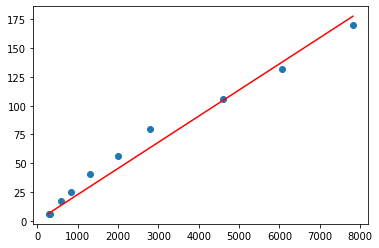

In [86]:
yhat = X.dot(b)
plt.scatter(X, y)
plt.plot(X, yhat, color='red')
plt.show()

<p>No final, chegamos ao mesmo resultado previsto.<p>

<div class="alert alert-block alert-info">
5. CASOS DE USO
</div>

<p>Agora fazendo fazendo as analises com outro exemplo.</p>

In [87]:
df_exercicio = pd.read_csv('/content/drive/My Drive/breast_cancer.csv')
df_exercicio.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<p>Nesse DataFrame, temos os dados relacionados a <strong>Câncer de Mama</strong>, mas focaremos nas colunas <strong>radius_mean</strong> e  <strong>radius_worst</strong>.</p>

In [88]:
listaColunas1 = df_exercicio.columns
for i in range(len(listaColunas1)):
  if (listaColunas1[i] != 'radius_mean' and listaColunas1[i] != 'radius_worst'):
    df_exercicio = df_exercicio.drop(columns=[listaColunas1[i]])

In [89]:
df_exercicio.head()

,radius_mean,radius_worst
0,17.99,25.38
1,20.57,24.99
2,19.69,23.57
3,11.42,14.91
4,20.29,22.54


<p>Agora seguiremos os mesmo passos descritos acima para analisar a relação entre o raio do cancer com o raio do cancer em um uma outra situação (piora). Usando o <strong>Linear Regression da sklearn.linear_model</strong>.</p>

In [90]:
array1 = []
for i in range(10):
  array1.append([df_exercicio['radius_mean'][i]])

array2 = list(np.array(df_exercicio['radius_worst'][:10]))
array2 = array2

In [91]:
rl2 = LinearRegression()
rl2.fit(array1, array2)

LinearRegression()

In [92]:
m = rl2.coef_[0]
b = rl2.intercept_
#print(m, b)
print(f'm = {m:.1f}, b = {b:.1f}')
print(f'Equação da reta: y = {m:.1f}x + {b:.1f}')

m = 1.2, b = 1.3
Equação da reta: y = 1.2x + 1.3


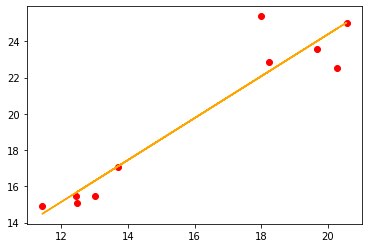

In [93]:
# Scatter plot da altura e peso de cada pessoa
plt.scatter(array1, array2, color='red')

# Gráfico de linha 
predicted_values = rl2.predict(array1)
plt.plot(array1, predicted_values, color='orange')
plt.show()

<div class="alert alert-block alert-info">
6. REFERÊNCIAS BIBLIOGRÁFICAS
</div>

<p>BROWNLEE, Jason. Linear ALgebra. https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/. Acessado em: 09/03/2022</p>

<p>CHAUHAN, Nagesh Singh. Data Sciente. A Beginner’s Guide to Linear Regression in Python with Scikit-Learn. 29 Mar 2019. https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html. Acessado em: 13/03/2022</p>

<p>DE ALMEIDA, João Victo Soares. CARVALHO JUNIOR. Manoel Marcelo. Predição de dados de saúde usando Regressão linear. 2019. https://github.com/joaosoaresaalm/Metodos-Numericos/blob/master/Exercicios/2%C2%BA%20Est%C3%A1gio/Relat%C3%B3rio%20MINIPROJETO%20II/
Projeto%20II%20-%20Predi%C3%A7%C3%A3o%20de%20Dados%20de%20Sa%C3%BAde%20usando%20Regress%C3%A3o%20Linear_vers%C3%A3o_final..ipynb. Acessado em: 09/03/2022</p>

<p>ESPOSITO. Piero. Python. Modelos de Predição | Regressão Linear. https://medium.com/turing-talks/turing-talks-11-modelo-de-predi%C3%A7%C3%A3o-regress%C3%A3o-linear-7842709a593b. Acessado em: 10/03/2022.</p>

<p>GUERRA, Leandro. Outspoken Market. https://www.youtube.com/watch?v=0mFvllux_zQ&t=844s. Acessado em: 09/03/2022</p>

<p>SANTANA, Rodrigo. SANTANA, Felipe. Curso de Data Science. Aula 01 - Machine learning - Introdução a Regressão Linear em Python. https://www.youtube.com/watch?v=wgi3dimsdu4&list=LL&index=5. Acessado em: 07/03/2022</p>

<p>SCUDILIO. Juliana. Análise de Dados. Scatter plot: Um Guia Completo para Gráficos de Dispersão. 17 Jul 2020. https://www.flai.com.br/juscudilio/scatter-plot-um-guia-completo-para-graficos-de-dispersao/. Acessado em: 13/03/2022</p>

<p>TCHILINA, Felipe. Negócios. Modelo Preditivo: o que é, para que serve e como aplicá-lo?. https://blogbr.clear.sale/modelo-preditivo-saiba-como-aplica-lo. Acessado em: 13/03/2022</p>

<p></p>